## 3_prompt_chaining.ipynb

In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv

In [2]:
load_dotenv()

model = ChatOpenAI()

In [3]:
class BlogState(TypedDict):

    title: str
    outline: str
    content: str

In [4]:
def create_outline(state: BlogState) -> BlogState:

    # fetch title
    title = state['title']

    # call llm gen outline
    prompt = f'Generate a detailed outline for a blog on the topic - {title}'
    outline = model.invoke(prompt).content

    # update state
    state['outline'] = outline

    return state

In [5]:
def create_blog(state: BlogState) -> BlogState:

    title = state['title']
    outline = state['outline']

    prompt = f'Write a detailed blog on the title - {title} using the follwing outline \n {outline}'

    content = model.invoke(prompt).content

    state['content'] = content

    return state

In [6]:
graph = StateGraph(BlogState)

# nodes
graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)

# edges
graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', END)

workflow = graph.compile()

In [7]:
intial_state = {'title': 'transitioning from being a Software Developer to An Applied GenAI Engineer'}

final_state = workflow.invoke(intial_state)

print(final_state)

{'title': 'transitioning from being a Software Developer to An Applied GenAI Engineer', 'outline': 'I. Introduction\n    A. Brief overview of the rise of Artificial Intelligence in various industries\n    B. Explanation of the role of an Applied GenAI Engineer\n    C. Transition from Software Developer to Applied GenAI Engineer: Challenges and opportunities\n\nII. Understanding the basics of Artificial Intelligence and GenAI\n    A. Definition and scope of Artificial Intelligence\n    B. Introduction to GenAI and its applications\n    C. Key differences between traditional software development and GenAI engineering\n\nIII. Developing the necessary skills for a career in GenAI engineering\n    A. Understanding machine learning algorithms and frameworks\n    B. Familiarity with neural networks and deep learning\n    C. Proficiency in programming languages such as Python and R\n    D. Knowledge of data engineering and data science concepts\n\nIV. Tools and technologies in the GenAI ecosys

In [8]:
print(final_state['outline'])

I. Introduction
    A. Brief overview of the rise of Artificial Intelligence in various industries
    B. Explanation of the role of an Applied GenAI Engineer
    C. Transition from Software Developer to Applied GenAI Engineer: Challenges and opportunities

II. Understanding the basics of Artificial Intelligence and GenAI
    A. Definition and scope of Artificial Intelligence
    B. Introduction to GenAI and its applications
    C. Key differences between traditional software development and GenAI engineering

III. Developing the necessary skills for a career in GenAI engineering
    A. Understanding machine learning algorithms and frameworks
    B. Familiarity with neural networks and deep learning
    C. Proficiency in programming languages such as Python and R
    D. Knowledge of data engineering and data science concepts

IV. Tools and technologies in the GenAI ecosystem
    A. Overview of popular AI tools and libraries
    B. Introduction to cloud platforms for AI development and 

In [9]:
print(final_state['content'])



I. Introduction

Artificial Intelligence (AI) has become increasingly pervasive across various industries in recent years, with the potential to revolutionize how we interact with technology and data. One key role that has emerged in this landscape is that of an Applied GenAI Engineer - a professional who combines software development skills with a deep understanding of AI technologies to create innovative solutions. In this blog, we will explore the transition from being a Software Developer to an Applied GenAI Engineer, including the challenges and opportunities that come with this change.

II. Understanding the basics of Artificial Intelligence and GenAI

Artificial Intelligence refers to the simulation of human intelligence processes by machines, including learning, reasoning, and self-correction. GenAI, on the other hand, refers to the application of AI technologies in various domains, such as healthcare, finance, and robotics. The key difference between traditional software dev

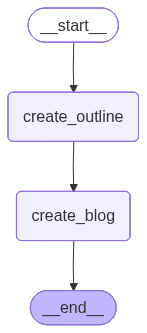

In [10]:
from IPython.display import Image

Image(workflow.get_graph().draw_mermaid_png())